Submitted by: <br>
Anurag Nagarkoti (239426), Wahab Haseeb Bhatti (239978), Suyash Gawandi (239716)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model

/Users/suyash/DKE/Semester5/IDL/mlvenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Load the data using Keras and print shape

In [2]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print("train_images shape: {}".format(train_images.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_images shape: {}".format(test_images.shape))
print("test_labels shape: {}".format(test_labels.shape))

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)


Display a sample image

[6]


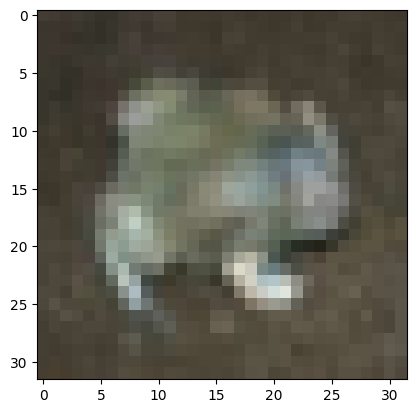

In [3]:
print(train_labels[132])
plt.imshow(train_images[132])

Reshaping the labels

In [4]:
train_labels = train_labels.reshape((-1,)).astype(np.int32)
test_labels  = test_labels.reshape((-1,)).astype(np.int32)
print(test_labels.shape)

(10000,)


# Model creation function with different filter sizes

In [5]:
def model_creation(filter_size):
  model = models.Sequential()
  model.add(layers.Conv2D(32, filter_size, activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, filter_size, activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, filter_size, activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  return model

**3x3 filter size**

In [6]:
with tf.device('/CPU:0'):

    cnn = model_creation(3)

    cnn.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    cnn.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7990 - accuracy: 0.3897 - val_loss: 1.4145 - val_accuracy: 0.4906
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3447 - accuracy: 0.5190 - val_loss: 1.2525 - val_accuracy: 0.5550
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1860 - accuracy: 0.5827 - val_loss: 1.1533 - val_accuracy: 0.5968
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0702 - accuracy: 0.6243 - val_loss: 1.0598 - val_accuracy: 0.6320
Epoch 5/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9784 - accuracy: 0.6589 - val_loss: 1.0768 - val_accuracy: 0.6288
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9174 - accuracy: 0.6777 - val_loss: 1.0348 - val_accuracy: 0.6426
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8527 - accuracy: 0.7004 - val_loss: 1.0350 -

In [ ]:
with tf.device('/GPU:0'):

    cnn = model_creation(3)

    cnn.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    cnn.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Epoch 1/10


2023-11-01 01:09:57.407431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 2.5276 - accuracy: 0.1983

2023-11-01 01:10:15.778322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 13ms/step - loss: 2.5276 - accuracy: 0.1983 - val_loss: 2.2067 - val_accuracy: 0.2659
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.4168 - accuracy: 0.1438 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.0998
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3032 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3039 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.3031 - accuracy: 0.0979 - val_loss: 2.3028 - val_accura

### Unrelated but noticed a difference in accuracies when trained on CPU vs GPU (Macbook Air M1), perhaps something with the low level implementation of tf?

**1x1 filter size**
- In this case, the accuracy is really bad because the feature information extracted is very local.

In [ ]:
with tf.device('/CPU:0'):
    cnn = model_creation(1)

    cnn.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    cnn.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5945 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0958 - val_loss: 2.3026 - val_ac

**5x5 filter size** <br>
Anything above 5x5 filter size resulted in output 0 as a result of downsampling. We can increase the input size to solve this problem.

In [ ]:
with tf.device('/CPU:0'):

    cnn = model_creation(5)

    cnn.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    cnn.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6681 - accuracy: 0.4161 - val_loss: 1.4441 - val_accuracy: 0.4908
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3388 - accuracy: 0.5303 - val_loss: 1.3004 - val_accuracy: 0.5423
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2073 - accuracy: 0.5770 - val_loss: 1.2000 - val_accuracy: 0.5835
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1173 - accuracy: 0.6132 - val_loss: 1.1509 - val_accuracy: 0.6095
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0344 - accuracy: 0.6421 - val_loss: 1.1775 - val_accuracy: 0.6055
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9763 - accuracy: 0.6625 - val_loss: 1.2453 - val_accuracy: 0.5922
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9223 - accuracy: 0.6815 - val_loss: 1.0957 -

# Convolution strides vs pooling for downsampling

1. Convolution with strides & no pooling

In [ ]:
with tf.device('/CPU:0'):


    model = models.Sequential()
    model.add(layers.Conv2D(32, 3, strides = (2,2),activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, 3, strides = (2,2),activation='relu'))
    model.add(layers.Conv2D(64, 3, activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.summary()

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 15, 15, 32)        896       
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                102464    
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 159434 (622.79 KB)
Trainable params: 159

2. Convolution with Max Pooling

In [ ]:
with tf.device('/CPU:0'):

    model = models.Sequential()
    model.add(layers.Conv2D(32, 3, strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, 3, strides=(1,1), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, 3, strides=(1,1), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.summary()


    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

In [ ]:
with tf.device('/CPU:0'):

    model = models.Sequential()
    model.add(layers.Conv2D(32, 3, strides=(2,2), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, 3, strides=(2,2), activation='relu'))
    model.add(layers.Conv2D(128, 3, strides=(1,1), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.summary()


    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 15, 15, 32)        896       
                                                                 
 conv2d_47 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 conv2d_48 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 average_pooling2d_4 (Avera  (None, 2, 2, 128)         0         
 gePooling2D)                                                    
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                32832     
                                                     

### Average pooling with Filter Size = Input

In [ ]:
with tf.device('/CPU:0'):

    model = models.Sequential()
    model.add(layers.Conv2D(32, (32,32), strides=(1,1), activation='relu', input_shape=(32, 32, 3),padding='same'))
    model.add(layers.Conv2D(64, 3, strides=(1,1), activation='relu'))
    model.add(layers.Conv2D(128, 3, strides=(1,1), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))

    model.summary()


    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 32, 32, 32)        98336     
                                                                 
 conv2d_67 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 conv2d_68 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 average_pooling2d_7 (Avera  (None, 14, 14, 128)       0         
 gePooling2D)                                                    
                                                                 
 flatten_17 (Flatten)        (None, 25088)             0         
                                                                 
 dense_34 (Dense)            (None, 64)                1605696   
                                                     

# Feature Maps
### Visualing feature maps generated from the first convolutional layer

In [ ]:
for i in range(len(cnn.layers)):
    layer = cnn.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_18 (None, 30, 30, 32)
2 conv2d_19 (None, 13, 13, 64)
4 conv2d_20 (None, 4, 4, 64)


In [ ]:
featureMapModel= Model(inputs=cnn.inputs, outputs= cnn.layers[0].output)

1/1 [==============================] - 0s 34ms/step


2023-11-01 01:43:54.410508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


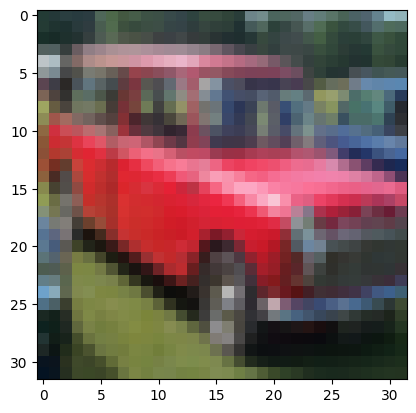

In [ ]:
feature_image=train_images[136]
plt.imshow(feature_image)
feature_image= np.reshape(feature_image, (-1, 32,32,3))
features= featureMapModel.predict(feature_image)

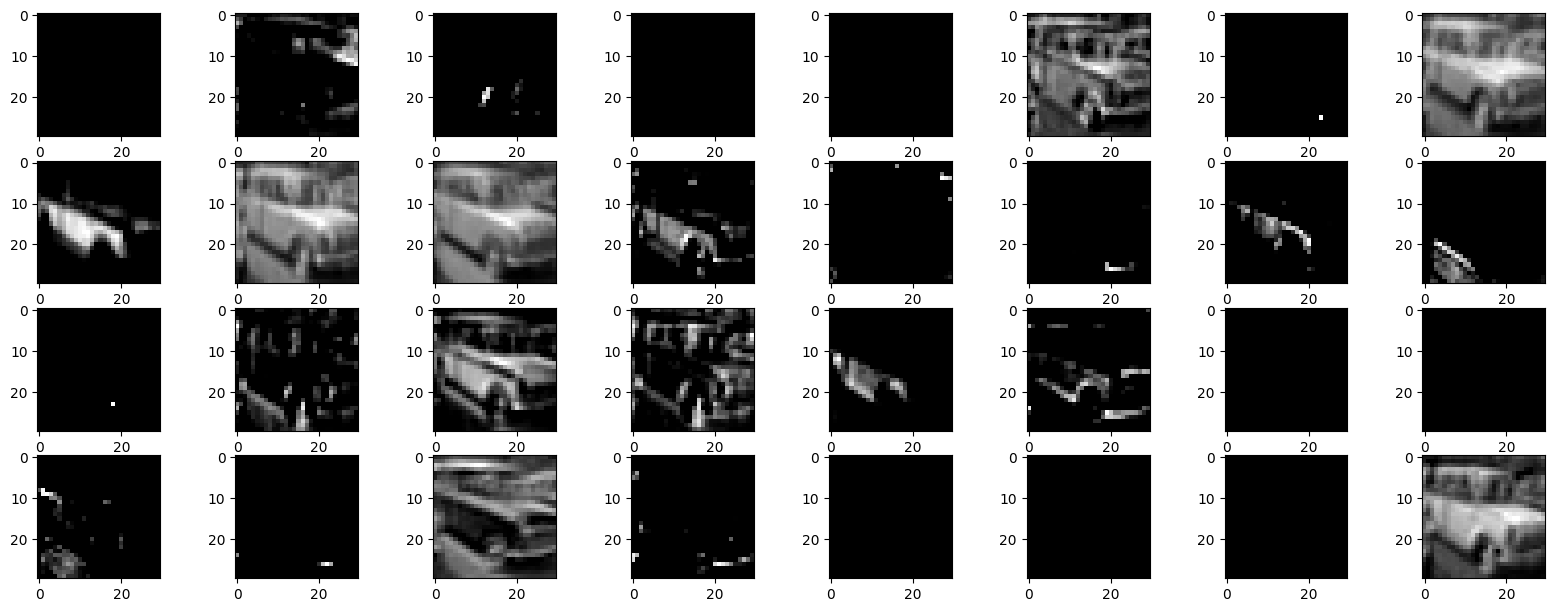

In [ ]:
from matplotlib import pyplot

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')

pyplot.show()